In [16]:
from numpy.random import seed
seed(1)

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,Dropout

# Initialising the CNN
classifier = Sequential()

classifier.add(Convolution2D(256, 3, 3, input_shape = (128,128, 1), activation = 'relu'))
classifier.add(Convolution2D(128, kernel_size=3,activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(Convolution2D(16, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(512, kernel_initializer='random_uniform',activation = 'tanh'))
classifier.add(Dropout(0.5))
classifier.add(Dense(256, kernel_initializer='random_uniform',activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(128, activation = 'sigmoid'))
classifier.add(Dropout(0.5))
classifier.add(Dense(64, activation = 'sigmoid'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=90,
                                   brightness_range=[0.3,0.6],
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (128,128),
                                                 batch_size = 64,
                                                 color_mode="grayscale",
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (128,128),
                                            batch_size = 32,
                                            color_mode="grayscale",
                                            class_mode = 'binary')

print(classifier.summary())
classifier.fit_generator(test_set,
                         epochs = 25)


Found 9475 images belonging to 2 classes.
Found 654 images belonging to 2 classes.
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 42, 42, 256)       2560      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 40, 40, 128)       295040    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 6, 6, 32)          36896     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 2, 2, 16)          4624      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 16)          0         
____________________________________

KeyboardInterrupt: 

In [60]:
from datetime import datetime
import numpy as np
acc=np.max(classifier.history.history['accuracy'])
now = datetime.now()
current_time = now.strftime("20%y-%m-%d-%H-%M-%S_accuracy-")
current_time=current_time+str(acc)+"model.h5"
classifier.save(current_time)

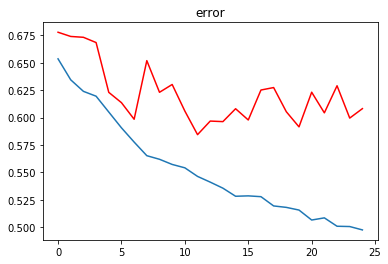

In [44]:
import matplotlib.pyplot as plt
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['val_loss'],color='red')
plt.title("error")
plt.show()

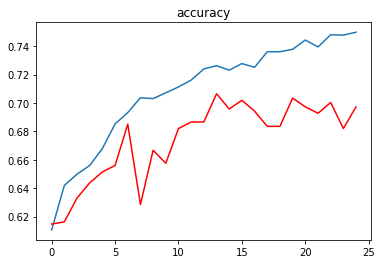

In [43]:
import matplotlib.pyplot as plt
plt.plot(classifier.history.history['accuracy'])
plt.plot(classifier.history.history['val_accuracy'],color='red')
plt.title("accuracy")
plt.show()